## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)    
print daily_engagement[0]

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollmentTableRows = 0
enrollmentTableUniques = {}

for enrollment in enrollments:
    enrollmentTableRows += 1
    enrollmentTableUniques[str(enrollment['account_key'])] = 0   
print enrollmentTableRows
print len(enrollmentTableUniques)

def counts(table, key):
    outCounts = {'rowCount': len(table), 'uniqueCount':{} }
    for row in table:
        outCounts['uniqueCount'][row[key]] = 0
        
    outCounts['uniqueCount'] = len(outCounts['uniqueCount'])
    return outCounts
    
print counts(enrollments, 'account_key')
print counts(daily_engagement, 'acct')
print counts(project_submissions, 'account_key')

1640
1302
{'rowCount': 1640, 'uniqueCount': 1302}
{'rowCount': 136240, 'uniqueCount': 1237}
{'rowCount': 3642, 'uniqueCount': 743}


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for row in daily_engagement:
    row['account_key'] = row['acct']
    del row['acct']

daily_engagement[0]['account_key']
    
##daily_engagement['account_key'] = daily_engagement['acct']
##del daily_engagement['acct']
        

u'0'

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for row in enrollments:
    match = False
    for row2 in daily_engagement:
        if row['account_key'] == row2['account_key']:
            match = True
    if match == False:
        break
        break
print row

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
countOfMoreThanOneDayEnrollment = 0
for row in enrollments:
    match = False
    for row2 in daily_engagement:
        if row['account_key'] == row2['account_key']:
            match = True
    if match == False:
        if row['join_date'] != row['cancel_date']:
            countOfMoreThanOneDayEnrollment += 1
            print row
print countOfMoreThanOneDayEnrollment


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for at least 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for enroll in non_udacity_enrollments:
    if enroll['days_to_cancel'] == None or enroll['days_to_cancel'] > 7:
        if paid_students.has_key(enroll['account_key']):
            if enroll['join_date'] > paid_students[enroll['account_key']]:
                paid_students[enroll['account_key']] = enroll['join_date']
        else:
            paid_students[enroll['account_key']] = enroll['join_date']

print len(paid_students)

995


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engage in non_udacity_engagement:
    if engage['account_key'] in paid_students and within_one_week(paid_students[engage['account_key']], engage['utc_date']):
        paid_engagement_in_first_week.append(engage)
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

#engagement_by_account = defaultdict(list)
#for engagement_record in paid_engagement_in_first_week:
#    account_key = engagement_record['account_key']
#    engagement_by_account[account_key].append(engagement_record)

def groupBy(inputData, groupByKey):
    out1 = defaultdict(list)
    for record in inputData:
        key = record[groupByKey]
        out1[key].append(record)
    return out1
        
engagement_by_account = groupBy(paid_engagement_in_first_week, 'account_key')
    
print engagement_by_account['108']

[{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 24, 0, 0)}, {u'lessons_completed': 0, u'num_co

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
#total_minutes_by_account = {}
#for account_key, engagement_for_student in engagement_by_account.items():
#    total_minutes = 0
#    for engagement_record in engagement_for_student:
#        total_minutes += engagement_record['total_minutes_visited']
#    total_minutes_by_account[account_key] = total_minutes
    ##if total_minutes > 10080:
    ##    print total_minutes_by_account[account_key] 
    ##    print engagement_record
    ##    break

def totalGroupsOn(inputData, totalOn):
    out = {}
    for account_key, engagement_for_student in inputData.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[totalOn]
            out[account_key] = total
    return out

total_minutes_by_account = totalGroupsOn(engagement_by_account, 'total_minutes_visited')

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()

def stats(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

stats(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

##done inline above


## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons
                                           
stats(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [22]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.


for record in paid_engagement_in_first_week:
    if record['total_minutes_visited'] > 0:
              record['has_visited'] = 1
    else:
              record['has_visited'] = 0

print len(paid_engagement_in_first_week)
            
engagement_by_account_new = groupBy(paid_engagement_in_first_week, 'account_key')   
print engagement_by_account_new['108']
total_days_by_account = totalGroupsOn(engagement_by_account_new, 'has_visited')
stats(total_days_by_account.values())


6919
[{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key':

## Splitting out Passing Students

In [23]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

#print project_submissions[0]

passing_engagement_by_acc = {}
non_passing_engagement_by_acc = {}



subs_grouped = groupBy(project_submissions, 'account_key' )
#print subs_grouped['108']

for acc in subs_grouped.items():
    #print acc[1]
    #break
    passing_engagement_by_acc[acc[0]] = 0
    non_passing_engagement_by_acc[acc[0]] = 0
    for sub in acc[1]:
        #print sub
        if sub['lesson_key'] in subway_project_lesson_keys and sub['processing_state'] == 'EVALUATED':
            if passing_engagement_by_acc[acc[0]] == 0:
                if sub['assigned_rating'] == 'PASSED' or sub['assigned_rating'] == 'DISTINCTION':
                    passing_engagement_by_acc[acc[0]] = 1
                    non_passing_engagement_by_acc[acc[0]] = 0
                else:
                    passing_engagement_by_acc[acc[0]] = 0
                    non_passing_engagement_by_acc[acc[0]] = 1   
                    
    #passing_engagement += passing_engagement_by_acc[acc[0]]
    #non_passing_engagement += non_passing_engagement_by_acc[acc[0]]
    
print passing_engagement_by_acc.values()
#print passing_engagement
print non_passing_engagement_by_acc.values()
#print non_passing_engagement
 
passing_engagement = []
non_passing_engagement = []

for record in paid_engagement_in_first_week:
    ##print record['account_key']
    if passing_engagement_by_acc.has_key(record['account_key']) and passing_engagement_by_acc[record['account_key']] == 1:
        passing_engagement.append(record)
    else:
        non_passing_engagement.append(record)

print len(passing_engagement)
print len(non_passing_engagement)
    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 

## Comparing the Two Student Groups

In [24]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
engagement_by_account_passing = groupBy(passing_engagement, 'account_key')   
#print engagement_by_account_new['108']
total_days_by_account_passing = totalGroupsOn(engagement_by_account_passing, 'has_visited')
total_min_by_account_passing = totalGroupsOn(engagement_by_account_passing, 'total_minutes_visited')
total_lesson_by_account_passing = totalGroupsOn(engagement_by_account_passing, 'lessons_completed')
stats(total_days_by_account_passing.values())

engagement_by_account_non_passing = groupBy(non_passing_engagement, 'account_key')   
#print engagement_by_account_new['108']
total_days_by_account_non_passing = totalGroupsOn(engagement_by_account_non_passing, 'has_visited')
total_min_by_account_non_passing = totalGroupsOn(engagement_by_account_non_passing, 'total_minutes_visited')
total_lesson_by_account_non_passing = totalGroupsOn(engagement_by_account_non_passing, 'total_minutes_visited')
stats(total_days_by_account_non_passing.values())


Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

Populating the interactive namespace from numpy and matplotlib


(array([ 87.,  82.,  79.,  91.,  77.,  85.,  78.,  68.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

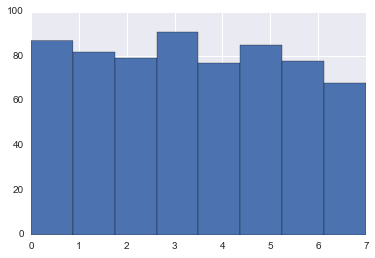

In [32]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
#break
%pylab inline
import matplotlib.pyplot as plt
plt.hist(list(total_days_by_account_passing.values()), bins=8)


Populating the interactive namespace from numpy and matplotlib


(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

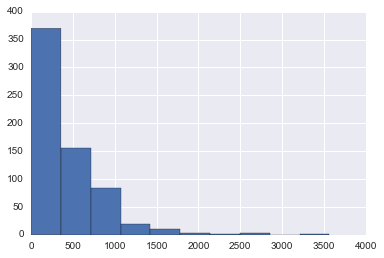

In [26]:
%pylab inline
import matplotlib.pyplot as plt1
plt1.hist(list(total_min_by_account_passing.values()))

Populating the interactive namespace from numpy and matplotlib


(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

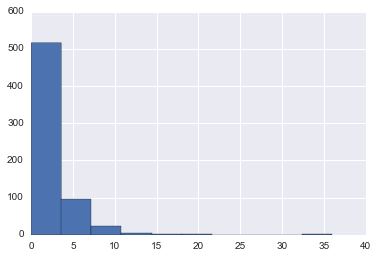

In [27]:
%pylab inline
import matplotlib.pyplot as plt1
plt1.hist(list(total_lesson_by_account_passing.values()))

Populating the interactive namespace from numpy and matplotlib


(array([ 97.,  90.,  56.,  41.,  15.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

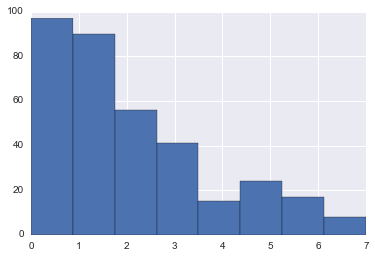

In [33]:
%pylab inline
import matplotlib.pyplot as plt1
plt1.hist(list(total_days_by_account_non_passing.values()), bins=8)

Populating the interactive namespace from numpy and matplotlib


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

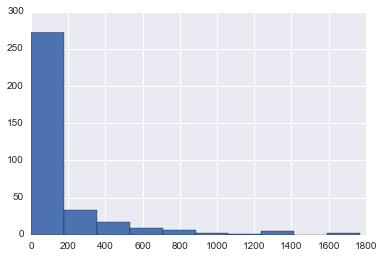

In [29]:
%pylab inline
import matplotlib.pyplot as plt1
plt1.hist(list(total_min_by_account_non_passing.values()))

Populating the interactive namespace from numpy and matplotlib


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

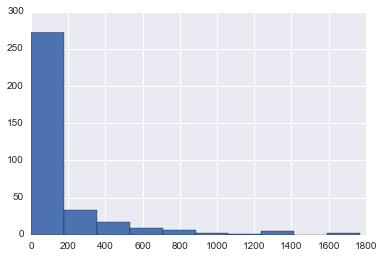

In [30]:
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt1
plt1.hist(list(total_lesson_by_account_non_passing.values()))

## Improving Plots and Sharing Findings

In [31]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.